In this example, we show how to compute $e_{\text{gw}}$
 from an eccentric waveform generated using the `SEOBNRv5EHM` waveform model.
We will use the python package `pyseobnr` from [here](https://git.ligo.org/waveforms/software/pyseobnr/).
The waveform loading function used in this notebook is based on the python example provided in the documentation [here](https://waveforms.docs.ligo.org/software/pyseobnr/source/notebooks/example_SEOBNRv5EHM.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")  # silence LAL warnings
from pyseobnr.generate_waveform import GenerateWaveform, generate_modes_opt

from gw_eccentricity import measure_eccentricity
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict

# In dimensionless units

In [2]:
# Input parameters
q = 5.3
chi_1 = 0.9
chi_2 = 0.3
omega_start = 0.0137  # This is the orbital frequency in geometric units with M=1
eccentricity = 0.4
rel_anomaly = 2.3

In [3]:
t, modes = generate_modes_opt(
    q,
    chi_1,
    chi_2,
    omega_start,
    eccentricity=eccentricity,
    rel_anomaly=rel_anomaly,
    approximant="SEOBNRv5EHM",
)

In [4]:
modes.keys()

dict_keys(['2,2', '2,1', '3,3', '3,2', '4,4', '4,3'])

## Get data dict in gw_eccentricity input format

In [5]:
def get_data_dict(t, modes):
    modes_dict = {}
    for k in modes.keys():
        modes_dict.update({tuple([int(x) for x in k.split(",")]): modes[k]})
    return {"t": t, "hlm": modes_dict}

In [6]:
data_dict = get_data_dict(t, modes)

## Compute $e_{\text{gw}}$

In [19]:
gwecc_dict = measure_eccentricity(
    dataDict=data_dict,
    tref_in=data_dict["t"])

In [8]:
gwecc_obj = gwecc_dict["gwecc_object"]

Text(0.5, 0, '$t$ [$M$]')

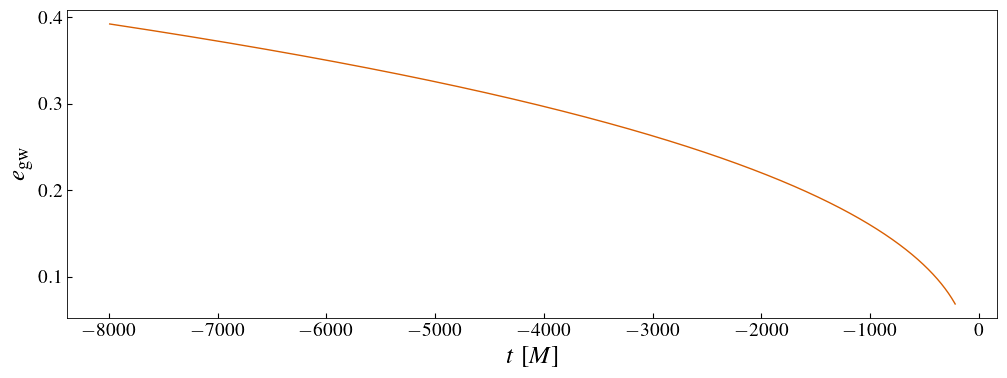

In [9]:
use_fancy_plotsettings()
fig, ax = gwecc_obj.plot_eccentricity()
ax.set_xlabel(labelsDict["t_dimless"])

# In physical units

In [10]:
# start with the usual parameter definitions
m1 = 50.0
m2 = 30.0
s1x = 0.0
s1y = 0.0
s1z = 0.0
s2x = 0.0
s2y = 0.0
s2z = 0.0

eccentricity = 0.3
rel_anomaly = np.pi

deltaT = 1.0 / 1024.0
f_min = 10.0
f_max = 512.0

distance = 1000.0
inclination = np.pi / 3.0
approximant = "SEOBNRv5EHM"

params_dict = {
    "mass1": m1,
    "mass2": m2,
    "spin1x": s1x,
    "spin1y": s1y,
    "spin1z": s1z,
    "spin2x": s2x,
    "spin2y": s2y,
    "spin2z": s2z,
    "deltaT": deltaT,
    "f22_start": f_min,
    "distance": distance,
    "inclination": inclination,
    "f_max": f_max,
    "mode_array": [
        (2, 2),
        (2, 1),
        (3, 2),
        (3, 3),
        (4, 3),
        (4, 4),
    ],  # Specify which modes are to be returned
    "approximant": approximant,
    "eccentricity": eccentricity,
    "rel_anomaly": rel_anomaly,
    "EccIC": 1,  # EccIC = 0 for instantaneous initial orbital frequency, and EccIC = 1 for orbit-averaged initial orbital frequency
}

In [11]:
wfm_gen = GenerateWaveform(params_dict)  # We call the generator with the parameters

In [12]:
times, hlm = wfm_gen.generate_td_modes()

In [13]:
# the mode keys are already in the gw_eccentricity format
hlm.keys()

dict_keys([(2, 2), (2, 1), (3, 2), (3, 3), (4, 3), (4, 4), (2, -2), (2, -1), (3, -2), (3, -3), (4, -3), (4, -4)])

In [14]:
data_dict_physical = {"t": times, "hlm": hlm}

In [18]:
gwecc_dict_physical = measure_eccentricity(
    dataDict=data_dict_physical,
    tref_in=data_dict_physical["t"],
)

In [16]:
gwecc_obj_physical = gwecc_dict_physical["gwecc_object"]

Text(0.5, 0, '$t$ [s] ')

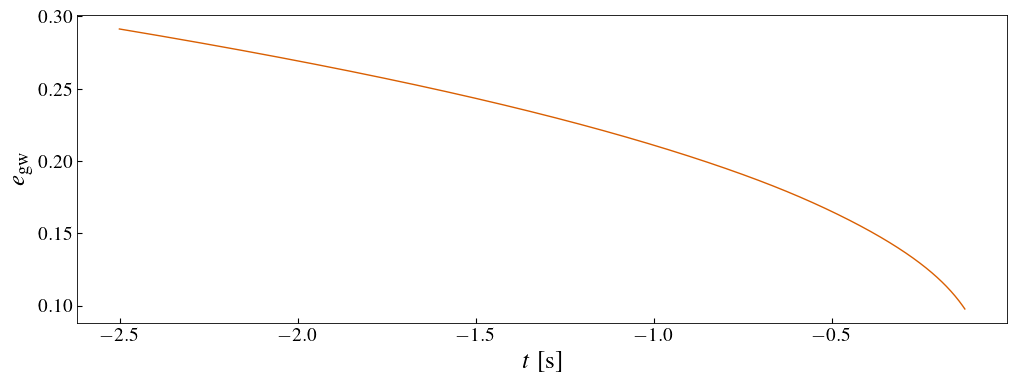

In [17]:
use_fancy_plotsettings()
fig, ax = gwecc_obj_physical.plot_eccentricity()
ax.set_xlabel(labelsDict["t"] + " [s] ")